In [9]:
# notebooks/final_comparison.ipynb

# Section 1: Import Libraries and Helpers
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
# Add the project root to the system path
if project_root not in sys.path:
    sys.path.append(project_root)


# Section 1: Import Libraries and Helpers

import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from helpers.visualization_helpers import plot_confusion_matrix
from tensorflow.keras.models import load_model


Test data loaded successfully.


C:\Users\paige\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Figure saved to ../outputs/figures/random_forest_confusion_matrix.png


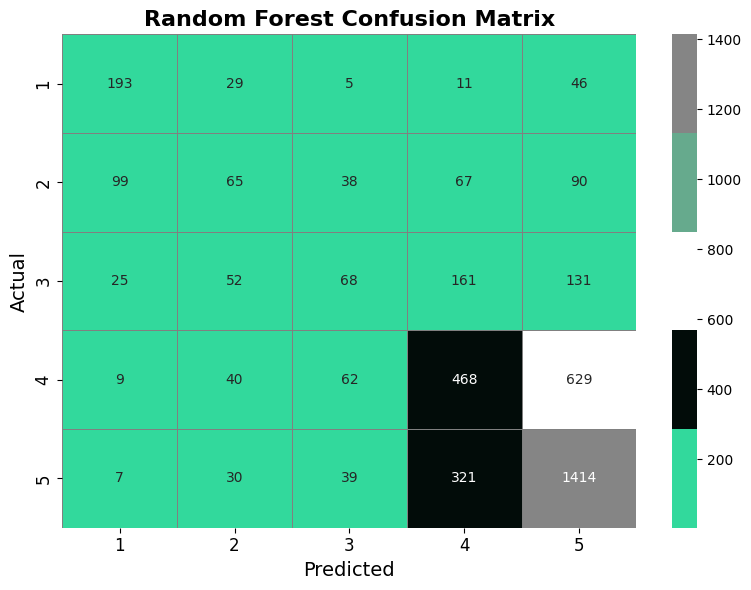

Figure saved to ../outputs/figures/logistic_regression_confusion_matrix.png


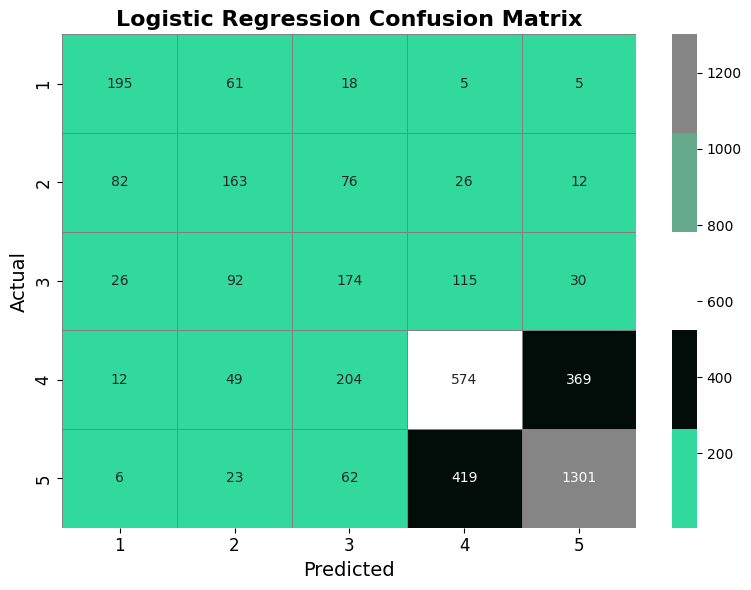

Figure saved to ../outputs/figures/neural_network_confusion_matrix.png


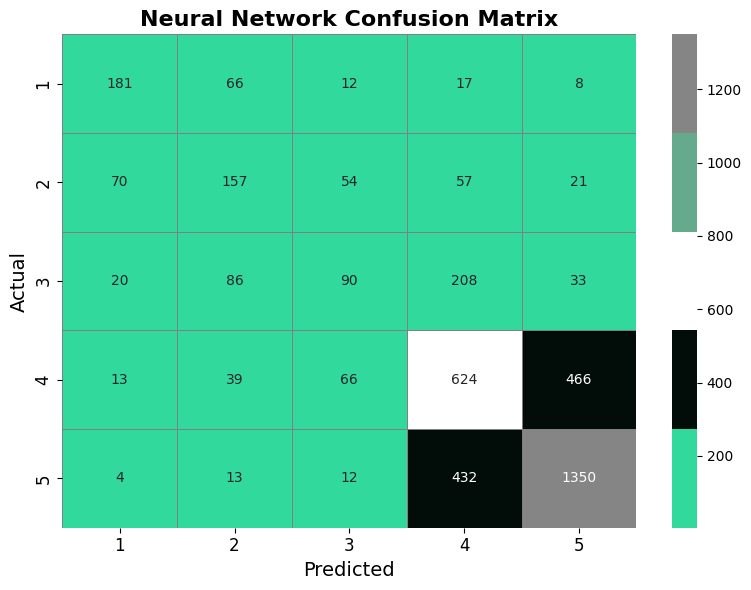


Model Performance Comparison:
                     Accuracy  Precision    Recall  F1-Score
Random Forest        0.538668   0.505318  0.538668  0.512044
Logistic Regression  0.587216   0.596909  0.587216  0.591096
Neural Network       0.585997   0.577678  0.585997  0.578469

Model comparison metrics saved successfully.


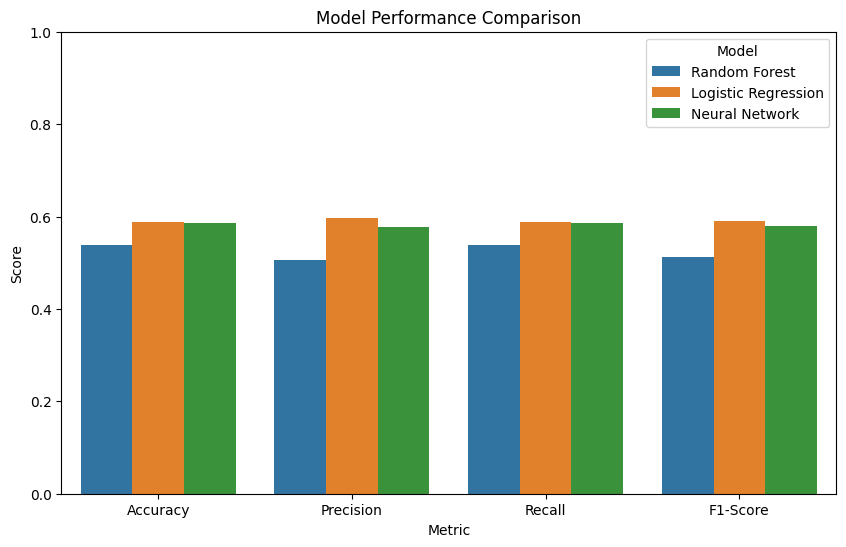

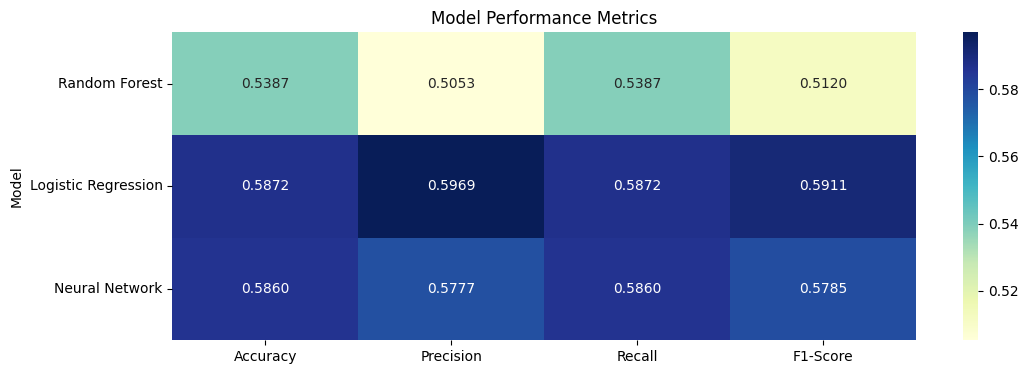

In [ ]:
X_test = joblib.load('../outputs/models/X_test_tfidf.joblib')
y_test = joblib.load('../outputs/models/y_test.joblib')

print("Test data loaded successfully.")

# Load models
models = {
    'Random Forest': joblib.load('../outputs/models/random_forest_model.joblib'),
    'Logistic Regression': joblib.load('../outputs/models/logistic_regression_model.joblib'),
    'Neural Network': load_model('../outputs/models/neural_network_model.keras')  # Updated Keras model

}

results = {}


####### NN PREDS 

# Convert sparse matrix to dense for Neural Network
X_test_dense = X_test.toarray()

# Neural Network predictions
nn_model = load_model('../outputs/models/neural_network_model.keras')
y_pred_nn_probs = nn_model.predict(X_test_dense)
y_pred_nn = np.argmax(y_pred_nn_probs, axis=1) + 1  # Adjust labels back to 1-5

# Iterate through models
for name, model in models.items():
    if name == 'Neural Network':
        y_pred = y_pred_nn
    else:
        y_pred = model.predict(X_test)
    # Calculate metrics
    from sklearn.metrics import accuracy_score, precision_recall_fscore_support
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    
    # Plot confusion matrix for each model
    plot_confusion_matrix(y_test, y_pred, 
                                 classes=[1, 2, 3, 4, 5], 
                                 title=f"{name} Confusion Matrix", 
                                 save_path=f'../outputs/figures/{name.lower().replace(" ", "_")}_confusion_matrix.png')


results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)

# Save comparison table
results_df.to_csv('../outputs/models/model_comparison_metrics.csv')
print("\nModel comparison metrics saved successfully.")


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
results_df.reset_index(inplace=True)
results_df = results_df.rename(columns={'index': 'Model'})


results_melted = results_df.melt(id_vars='Model', value_vars=metrics, var_name='Metric', value_name='Score') # melt for seaborn

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=results_melted)
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.legend(title='Model')
plt.savefig('../outputs/figures/model_performance_comparison.png')
plt.show()

plt.figure(figsize=(12, 4))
sns.heatmap(results_df.set_index('Model'), annot=True, cmap='YlGnBu', fmt=".4f")
plt.title("Model Performance Metrics")
plt.show()
